In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')# Load saved data

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_general_model.npz', allow_pickle=True)

EventCount = data['all_EventCount']
DeviceActiveCount = data['all_DeviceActiveCount']
DeviceProbability = data['all_DeviceProbability']
DeviceAlarmStatus = data['all_DeviceAlarmStatus']
DeviceStatus = data['all_DeviceStatus'].astype(bool)  # Ensure boolean type
DeviceLocations = data['all_DeviceLocations']
DeviceLocationsUncorrelated = data['all_DeviceLocationsUncorrelated']
DeviceLocationsPolar = data['all_DeviceLocationsPolar']
EventLocations = data['all_EventLocations']
EventLocationsPolar = data['all_EventLocationsPolar']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_general_model.npz', allow_pickle=True)
all_DeviceLocations = data['all_DeviceLocationsUncorrelated']
num_samples = data['num_samples']
device_count = data['device_count']
sparsity = data['sparsity']

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/e1_communication_simulation_theta.npz", allow_pickle=True)
all_theta = data["all_theta"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/e1_communication_simulation_gamma.npz", allow_pickle=True)
all_gamma = data["all_gamma"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/e1_communication_simulation_z.npz", allow_pickle=True)
all_z = data["all_z"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/e1_communication_simulation_noise.npz", allow_pickle=True)
all_noise = data["all_noise"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/e1_communication_simulation_received_signal.npz", allow_pickle=True)
all_received_signal = data["all_received_signal"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/e1_communication_simulation_general.npz", allow_pickle=True)
snr_db_array = data["snr_db_array"]
pilot_length_array = data["pilot_length_array"]
M = data["M"]

Mounted at /content/drive


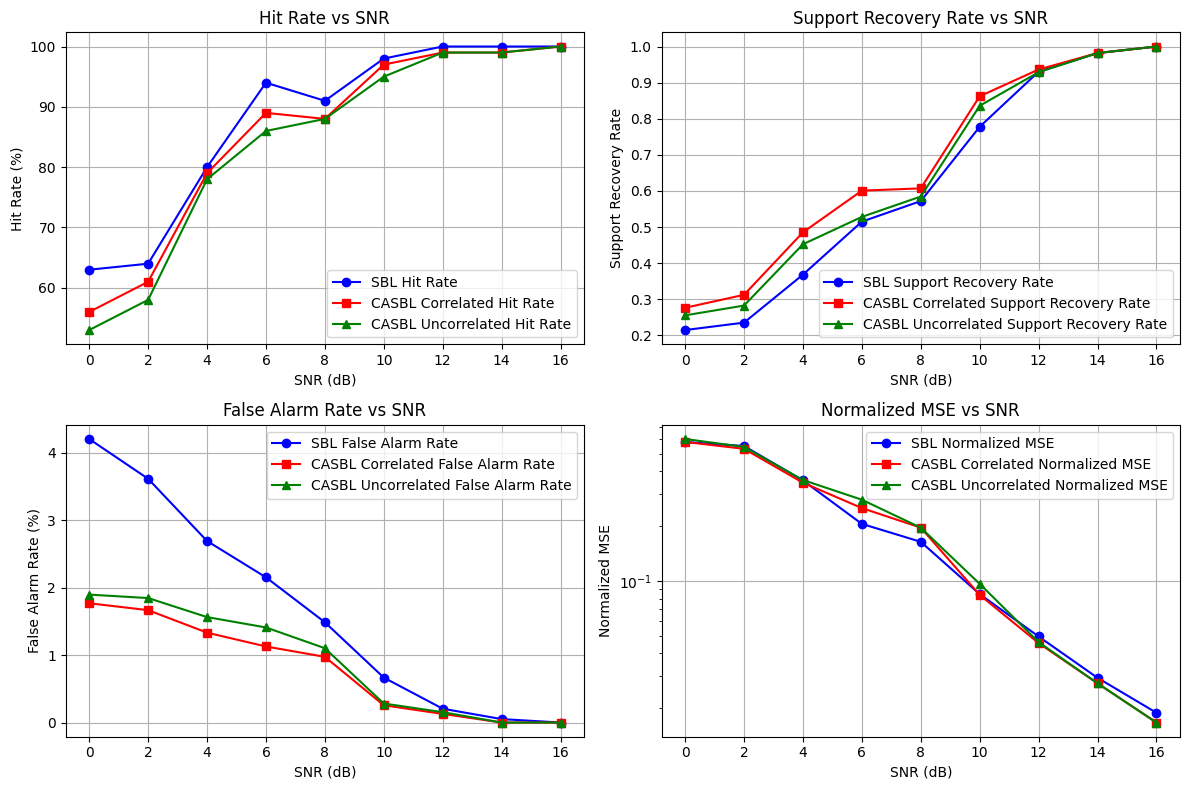

In [ ]:
data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_sbl_snr_db_all_pilot_length_7.npz', allow_pickle=True)

gamma_sbl = data['gamma_sbl']
hit_rate_sbl = data['hit_rate_sbl']
support_recovery_rate_sbl = data['support_recovery_rate_sbl']
false_alarm_rate_sbl = data['false_alarm_rate_sbl']
norm_mse_sbl = data['norm_mse_sbl']
avg_hit_rate_sbl = data['avg_hit_rate_sbl']
avg_support_recovery_rate_sbl = data['avg_support_recovery_rate_sbl']
avg_false_alarm_rate_sbl = data['avg_false_alarm_rate_sbl']
avg_norm_mse_sbl = data['avg_norm_mse_sbl']
pilot_length = data['pilot_length']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_casbl_m1_ram_snr_db_all_pilot_length_7.npz', allow_pickle=True)

gamma_casbl_uncorrelated = data['gamma_casbl']
hit_rate_casbl_uncorrelated = data['hit_rate_casbl']
support_recovery_rate_casbl_uncorrelated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_uncorrelated = data['false_alarm_rate_casbl']
norm_mse_casbl_uncorrelated = data['norm_mse_casbl']
avg_hit_rate_casbl_uncorrelated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_uncorrelated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_uncorrelated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_uncorrelated = data['avg_norm_mse_casbl']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_casbl_m1_edam_snr_db_all_pilot_length_7.npz', allow_pickle=True)

gamma_casbl_correlated = data['gamma_casbl']
hit_rate_casbl_correlated = data['hit_rate_casbl']
support_recovery_rate_casbl_correlated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_correlated = data['false_alarm_rate_casbl']
norm_mse_casbl_correlated = data['norm_mse_casbl']
avg_hit_rate_casbl_correlated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_correlated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_correlated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_correlated = data['avg_norm_mse_casbl']

pilot_length_index = np.where(pilot_length_array == pilot_length)[0][0]

# Define the SNR values for x-axis
snr_values = snr_db_array

# Create subplots for different performance metrics
plt.figure(figsize=(12, 8))

# Plot Hit Rate
plt.subplot(2, 2, 1)
plt.plot(snr_values, avg_hit_rate_sbl, marker='o', linestyle='-', color='b', label='SBL Hit Rate')
plt.plot(snr_values, avg_hit_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Hit Rate')
plt.plot(snr_values, avg_hit_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Hit Rate')
plt.xlabel("SNR (dB)")
plt.ylabel("Hit Rate (%)")
plt.title("Hit Rate vs SNR")
plt.grid(True)
plt.legend()

# Plot Support Recovery Rate
plt.subplot(2, 2, 2)
plt.plot(snr_values, avg_support_recovery_rate_sbl, marker='o', linestyle='-', color='b', label='SBL Support Recovery Rate')
plt.plot(snr_values, avg_support_recovery_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Support Recovery Rate')
plt.plot(snr_values, avg_support_recovery_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Support Recovery Rate')
plt.xlabel("SNR (dB)")
plt.ylabel("Support Recovery Rate")
plt.title("Support Recovery Rate vs SNR")
plt.grid(True)
plt.legend()

# Plot False Alarm Rate
plt.subplot(2, 2, 3)
plt.plot(snr_values, avg_false_alarm_rate_sbl, marker='o', linestyle='-', color='b', label='SBL False Alarm Rate')
plt.plot(snr_values, avg_false_alarm_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated False Alarm Rate')
plt.plot(snr_values, avg_false_alarm_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated False Alarm Rate')
plt.xlabel("SNR (dB)")
plt.ylabel("False Alarm Rate (%)")
plt.title("False Alarm Rate vs SNR")
plt.grid(True)
plt.legend()

# Plot Normalized MSE
plt.subplot(2, 2, 4)
plt.plot(snr_values, avg_norm_mse_sbl, marker='o', linestyle='-', color='b', label='SBL Normalized MSE')
plt.plot(snr_values, avg_norm_mse_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Normalized MSE')
plt.plot(snr_values, avg_norm_mse_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Normalized MSE')
plt.xlabel("SNR (dB)")
plt.ylabel("Normalized MSE")
plt.title("Normalized MSE vs SNR")
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


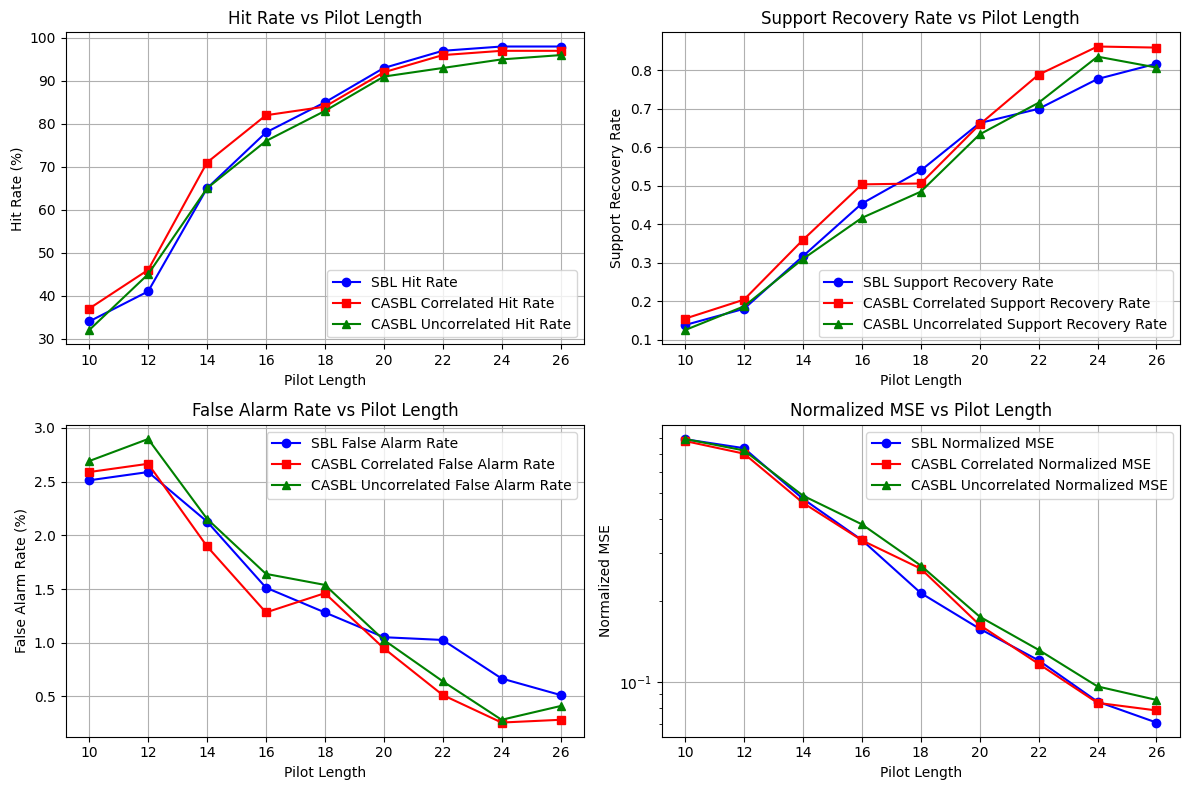

In [ ]:
data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_sbl_pilot_length_all_snr_db_5.npz', allow_pickle=True)

gamma_sbl = data['gamma_sbl']
hit_rate_sbl = data['hit_rate_sbl']
support_recovery_rate_sbl = data['support_recovery_rate_sbl']
false_alarm_rate_sbl = data['false_alarm_rate_sbl']
norm_mse_sbl = data['norm_mse_sbl']
avg_hit_rate_sbl = data['avg_hit_rate_sbl']
avg_support_recovery_rate_sbl = data['avg_support_recovery_rate_sbl']
avg_false_alarm_rate_sbl = data['avg_false_alarm_rate_sbl']
avg_norm_mse_sbl = data['avg_norm_mse_sbl']
snr_db = data['snr_db']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_casbl_m1_ram_pilot_length_all_snr_db_5.npz', allow_pickle=True)

gamma_casbl_uncorrelated = data['gamma_casbl']
hit_rate_casbl_uncorrelated = data['hit_rate_casbl']
support_recovery_rate_casbl_uncorrelated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_uncorrelated = data['false_alarm_rate_casbl']
norm_mse_casbl_uncorrelated = data['norm_mse_casbl']
avg_hit_rate_casbl_uncorrelated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_uncorrelated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_uncorrelated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_uncorrelated = data['avg_norm_mse_casbl']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_casbl_m1_edam_pilot_length_all_snr_db_5.npz', allow_pickle=True)

gamma_casbl_correlated = data['gamma_casbl']
hit_rate_casbl_correlated = data['hit_rate_casbl']
support_recovery_rate_casbl_correlated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_correlated = data['false_alarm_rate_casbl']
norm_mse_casbl_correlated = data['norm_mse_casbl']
avg_hit_rate_casbl_correlated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_correlated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_correlated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_correlated = data['avg_norm_mse_casbl']

snr_db_index = np.where(snr_db_array == snr_db)[0][0]

# Define the SNR values for x-axis
pilot_length_values = pilot_length_array

# Create subplots for different performance metrics
plt.figure(figsize=(12, 8))

# Plot Hit Rate
plt.subplot(2, 2, 1)
plt.plot(pilot_length_values, avg_hit_rate_sbl, marker='o', linestyle='-', color='b', label='SBL Hit Rate')
plt.plot(pilot_length_values, avg_hit_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Hit Rate')
plt.plot(pilot_length_values, avg_hit_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Hit Rate')
plt.xlabel("Pilot Length")
plt.ylabel("Hit Rate (%)")
plt.title("Hit Rate vs Pilot Length")
plt.grid(True)
plt.legend()

# Plot Support Recovery Rate
plt.subplot(2, 2, 2)
plt.plot(pilot_length_values, avg_support_recovery_rate_sbl, marker='o', linestyle='-', color='b', label='SBL Support Recovery Rate')
plt.plot(pilot_length_values, avg_support_recovery_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Support Recovery Rate')
plt.plot(pilot_length_values, avg_support_recovery_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Support Recovery Rate')
plt.xlabel("Pilot Length")
plt.ylabel("Support Recovery Rate")
plt.title("Support Recovery Rate vs Pilot Length")
plt.grid(True)
plt.legend()

# Plot False Alarm Rate
plt.subplot(2, 2, 3)
plt.plot(pilot_length_values, avg_false_alarm_rate_sbl, marker='o', linestyle='-', color='b', label='SBL False Alarm Rate')
plt.plot(pilot_length_values, avg_false_alarm_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated False Alarm Rate')
plt.plot(pilot_length_values, avg_false_alarm_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated False Alarm Rate')
plt.xlabel("Pilot Length")
plt.ylabel("False Alarm Rate (%)")
plt.title("False Alarm Rate vs Pilot Length")
plt.grid(True)
plt.legend()

# Plot Normalized MSE
plt.subplot(2, 2, 4)
plt.plot(pilot_length_values, avg_norm_mse_sbl, marker='o', linestyle='-', color='b', label='SBL Normalized MSE')
plt.plot(pilot_length_values, avg_norm_mse_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Normalized MSE')
plt.plot(pilot_length_values, avg_norm_mse_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Normalized MSE')
plt.xlabel("Pilot Length")
plt.ylabel("Normalized MSE")
plt.title("Normalized MSE vs Pilot Length")
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


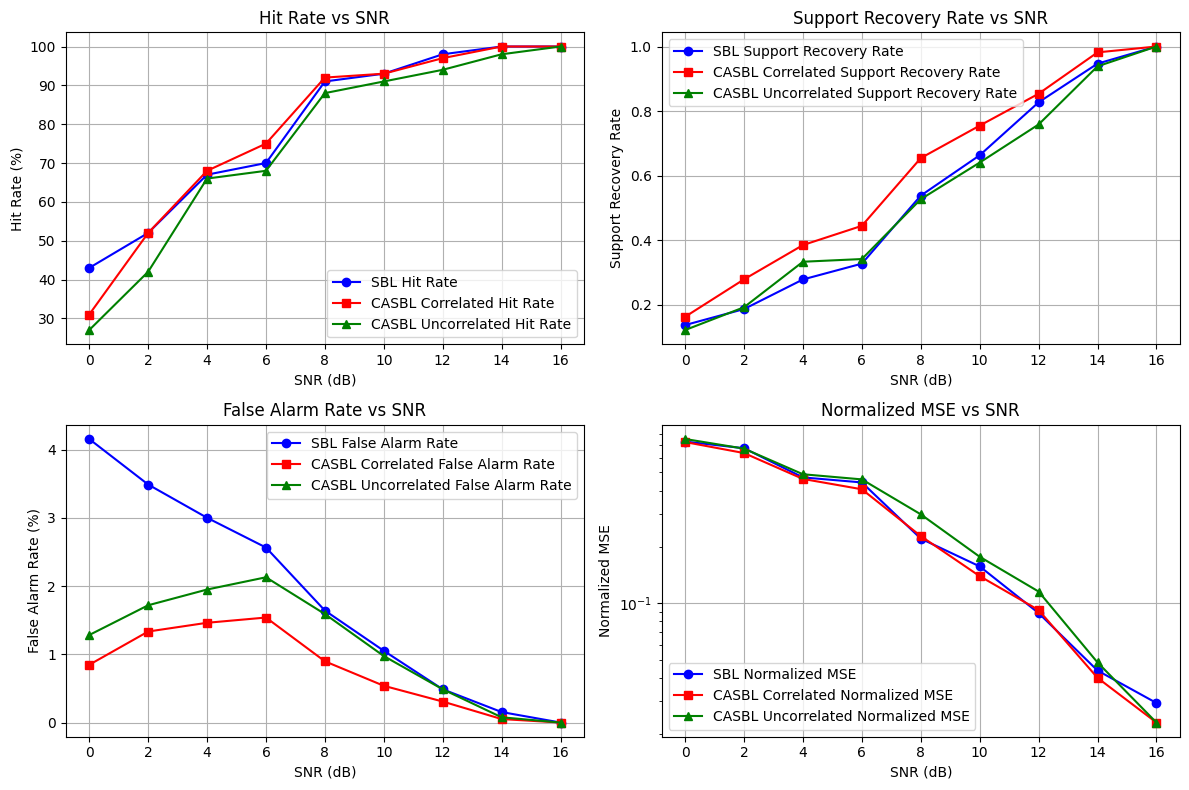

In [3]:
data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_sbl_snr_db_all_pilot_length_5.npz', allow_pickle=True)

gamma_sbl = data['gamma_sbl']
hit_rate_sbl = data['hit_rate_sbl']
support_recovery_rate_sbl = data['support_recovery_rate_sbl']
false_alarm_rate_sbl = data['false_alarm_rate_sbl']
norm_mse_sbl = data['norm_mse_sbl']
avg_hit_rate_sbl = data['avg_hit_rate_sbl']
avg_support_recovery_rate_sbl = data['avg_support_recovery_rate_sbl']
avg_false_alarm_rate_sbl = data['avg_false_alarm_rate_sbl']
avg_norm_mse_sbl = data['avg_norm_mse_sbl']
pilot_length = data['pilot_length']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_casbl_m2_ram_snr_db_all_pilot_length_5.npz', allow_pickle=True)

gamma_casbl_uncorrelated = data['gamma_casbl']
hit_rate_casbl_uncorrelated = data['hit_rate_casbl']
support_recovery_rate_casbl_uncorrelated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_uncorrelated = data['false_alarm_rate_casbl']
norm_mse_casbl_uncorrelated = data['norm_mse_casbl']
avg_hit_rate_casbl_uncorrelated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_uncorrelated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_uncorrelated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_uncorrelated = data['avg_norm_mse_casbl']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_casbl_m2_edam_snr_db_all_pilot_length_5.npz', allow_pickle=True)

gamma_casbl_correlated = data['gamma_casbl']
hit_rate_casbl_correlated = data['hit_rate_casbl']
support_recovery_rate_casbl_correlated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_correlated = data['false_alarm_rate_casbl']
norm_mse_casbl_correlated = data['norm_mse_casbl']
avg_hit_rate_casbl_correlated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_correlated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_correlated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_correlated = data['avg_norm_mse_casbl']

pilot_length_index = np.where(pilot_length_array == pilot_length)[0][0]

# Define the SNR values for x-axis
snr_values = snr_db_array

# Create subplots for different performance metrics
plt.figure(figsize=(12, 8))

# Plot Hit Rate
plt.subplot(2, 2, 1)
plt.plot(snr_values, avg_hit_rate_sbl, marker='o', linestyle='-', color='b', label='SBL Hit Rate')
plt.plot(snr_values, avg_hit_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Hit Rate')
plt.plot(snr_values, avg_hit_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Hit Rate')
plt.xlabel("SNR (dB)")
plt.ylabel("Hit Rate (%)")
plt.title("Hit Rate vs SNR")
plt.grid(True)
plt.legend()

# Plot Support Recovery Rate
plt.subplot(2, 2, 2)
plt.plot(snr_values, avg_support_recovery_rate_sbl, marker='o', linestyle='-', color='b', label='SBL Support Recovery Rate')
plt.plot(snr_values, avg_support_recovery_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Support Recovery Rate')
plt.plot(snr_values, avg_support_recovery_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Support Recovery Rate')
plt.xlabel("SNR (dB)")
plt.ylabel("Support Recovery Rate")
plt.title("Support Recovery Rate vs SNR")
plt.grid(True)
plt.legend()

# Plot False Alarm Rate
plt.subplot(2, 2, 3)
plt.plot(snr_values, avg_false_alarm_rate_sbl, marker='o', linestyle='-', color='b', label='SBL False Alarm Rate')
plt.plot(snr_values, avg_false_alarm_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated False Alarm Rate')
plt.plot(snr_values, avg_false_alarm_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated False Alarm Rate')
plt.xlabel("SNR (dB)")
plt.ylabel("False Alarm Rate (%)")
plt.title("False Alarm Rate vs SNR")
plt.grid(True)
plt.legend()

# Plot Normalized MSE
plt.subplot(2, 2, 4)
plt.plot(snr_values, avg_norm_mse_sbl, marker='o', linestyle='-', color='b', label='SBL Normalized MSE')
plt.plot(snr_values, avg_norm_mse_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Normalized MSE')
plt.plot(snr_values, avg_norm_mse_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Normalized MSE')
plt.xlabel("SNR (dB)")
plt.ylabel("Normalized MSE")
plt.title("Normalized MSE vs SNR")
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


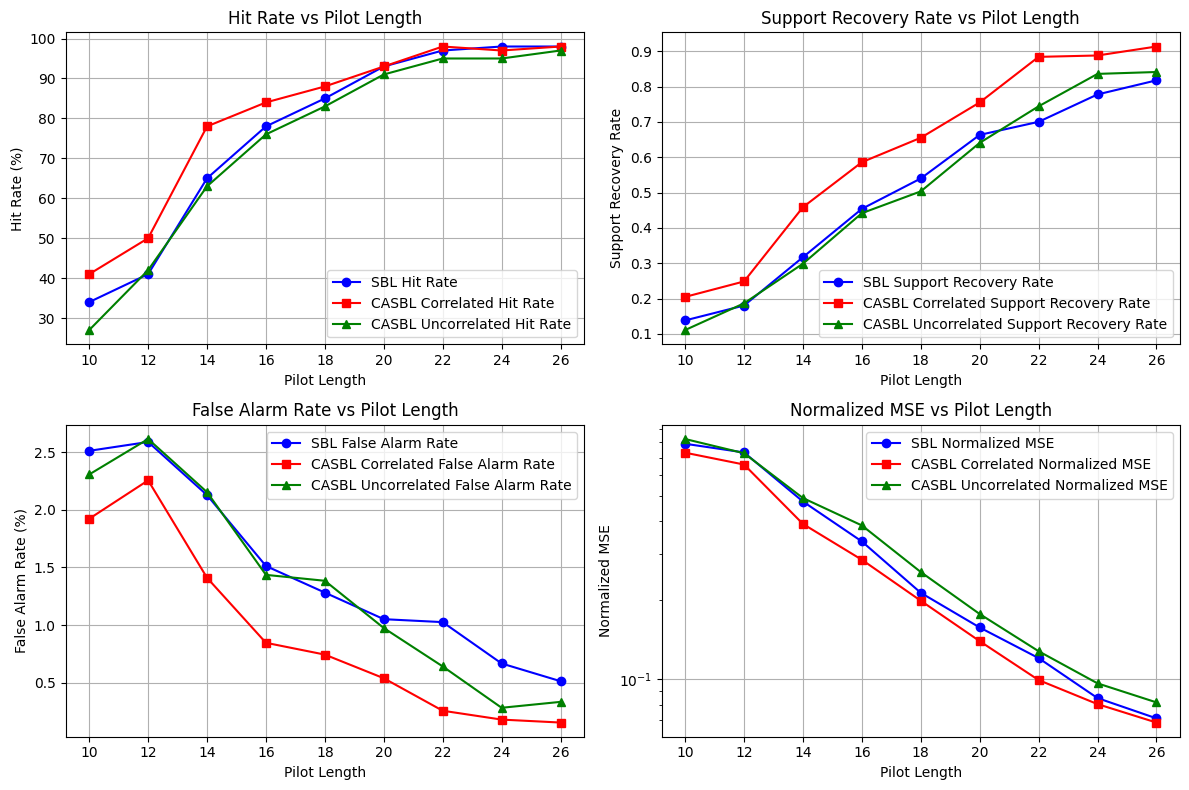

In [ ]:
data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_sbl_pilot_length_all_snr_db_5.npz', allow_pickle=True)

gamma_sbl = data['gamma_sbl']
hit_rate_sbl = data['hit_rate_sbl']
support_recovery_rate_sbl = data['support_recovery_rate_sbl']
false_alarm_rate_sbl = data['false_alarm_rate_sbl']
norm_mse_sbl = data['norm_mse_sbl']
avg_hit_rate_sbl = data['avg_hit_rate_sbl']
avg_support_recovery_rate_sbl = data['avg_support_recovery_rate_sbl']
avg_false_alarm_rate_sbl = data['avg_false_alarm_rate_sbl']
avg_norm_mse_sbl = data['avg_norm_mse_sbl']
snr_db = data['snr_db']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_casbl_m2_ram_pilot_length_all_snr_db_5.npz', allow_pickle=True)

gamma_casbl_uncorrelated = data['gamma_casbl']
hit_rate_casbl_uncorrelated = data['hit_rate_casbl']
support_recovery_rate_casbl_uncorrelated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_uncorrelated = data['false_alarm_rate_casbl']
norm_mse_casbl_uncorrelated = data['norm_mse_casbl']
avg_hit_rate_casbl_uncorrelated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_uncorrelated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_uncorrelated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_uncorrelated = data['avg_norm_mse_casbl']

data = np.load('/content/drive/My Drive/Github/mtc-device-activation/e1_simulation_results_casbl_m2_edam_pilot_length_all_snr_db_5.npz', allow_pickle=True)

gamma_casbl_correlated = data['gamma_casbl']
hit_rate_casbl_correlated = data['hit_rate_casbl']
support_recovery_rate_casbl_correlated = data['support_recovery_rate_casbl']
false_alarm_rate_casbl_correlated = data['false_alarm_rate_casbl']
norm_mse_casbl_correlated = data['norm_mse_casbl']
avg_hit_rate_casbl_correlated = data['avg_hit_rate_casbl']
avg_support_recovery_rate_casbl_correlated = data['avg_support_recovery_rate_casbl']
avg_false_alarm_rate_casbl_correlated = data['avg_false_alarm_rate_casbl']
avg_norm_mse_casbl_correlated = data['avg_norm_mse_casbl']

snr_db_index = np.where(snr_db_array == snr_db)[0][0]

# Define the SNR values for x-axis
pilot_length_values = pilot_length_array

# Create subplots for different performance metrics
plt.figure(figsize=(12, 8))

# Plot Hit Rate
plt.subplot(2, 2, 1)
plt.plot(pilot_length_values, avg_hit_rate_sbl, marker='o', linestyle='-', color='b', label='SBL Hit Rate')
plt.plot(pilot_length_values, avg_hit_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Hit Rate')
plt.plot(pilot_length_values, avg_hit_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Hit Rate')
plt.xlabel("Pilot Length")
plt.ylabel("Hit Rate (%)")
plt.title("Hit Rate vs Pilot Length")
plt.grid(True)
plt.legend()

# Plot Support Recovery Rate
plt.subplot(2, 2, 2)
plt.plot(pilot_length_values, avg_support_recovery_rate_sbl, marker='o', linestyle='-', color='b', label='SBL Support Recovery Rate')
plt.plot(pilot_length_values, avg_support_recovery_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Support Recovery Rate')
plt.plot(pilot_length_values, avg_support_recovery_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Support Recovery Rate')
plt.xlabel("Pilot Length")
plt.ylabel("Support Recovery Rate")
plt.title("Support Recovery Rate vs Pilot Length")
plt.grid(True)
plt.legend()

# Plot False Alarm Rate
plt.subplot(2, 2, 3)
plt.plot(pilot_length_values, avg_false_alarm_rate_sbl, marker='o', linestyle='-', color='b', label='SBL False Alarm Rate')
plt.plot(pilot_length_values, avg_false_alarm_rate_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated False Alarm Rate')
plt.plot(pilot_length_values, avg_false_alarm_rate_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated False Alarm Rate')
plt.xlabel("Pilot Length")
plt.ylabel("False Alarm Rate (%)")
plt.title("False Alarm Rate vs Pilot Length")
plt.grid(True)
plt.legend()

# Plot Normalized MSE
plt.subplot(2, 2, 4)
plt.plot(pilot_length_values, avg_norm_mse_sbl, marker='o', linestyle='-', color='b', label='SBL Normalized MSE')
plt.plot(pilot_length_values, avg_norm_mse_casbl_correlated, marker='s', linestyle='-', color='r', label='CASBL Correlated Normalized MSE')
plt.plot(pilot_length_values, avg_norm_mse_casbl_uncorrelated, marker='^', linestyle='-', color='g', label='CASBL Uncorrelated Normalized MSE')
plt.xlabel("Pilot Length")
plt.ylabel("Normalized MSE")
plt.title("Normalized MSE vs Pilot Length")
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
